# EDA on Sentiments: Correlation

Analyse statement by Loughran and McDonald dictionary


In [1]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client
INFO:ekorpkit.base:Google Colab not detected.


version: 0.1.35+0.g69734d6.dirty
is notebook? True
is colab? False
evironment varialbles:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


In [2]:
start_year = 1999
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Load datasets


In [3]:
tone_data_lm = eKonf.load_data("fomc_tone_data_lm.parquet", data_dir)
tone_data_lm


,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
date,,,,,,,,,,,,,,,,,,,,,
1990-02-07,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,NaN,NaN,-0.167014,NaN,-0.12,NaN,NaN,NaN,...,3066.0,NaN,556.0,NaN,NaN,NaN,NaN,31.937500,NaN,27.8
2021-12-01,-0.046022,NaN,NaN,NaN,NaN,NaN,NaN,-0.048109,NaN,NaN,...,NaN,NaN,NaN,22.539497,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,-0.077381,NaN,NaN,NaN,NaN,NaN,...,6514.0,NaN,NaN,NaN,NaN,NaN,NaN,36.188889,NaN,NaN


In [4]:
tone_data_finbert = eKonf.load_data("fomc_tone_data_finbert.parquet", data_dir)

cols = [
    "polarity_mean_minutes",
    "polarity_mean_press_conf",
    "polarity_mean_speech",
    "polarity_mean_statement",
    "polarity_diffusion_minutes",
    "polarity_diffusion_press_conf",
    "polarity_diffusion_speech",
    "polarity_diffusion_statement",
]

tone_data_finbert = tone_data_finbert[cols].copy()
tone_data_finbert.columns = tone_data_finbert.columns.str.replace("polarity", "finbert")
tone_data_finbert


,finbert_mean_minutes,finbert_mean_press_conf,finbert_mean_speech,finbert_mean_statement,finbert_diffusion_minutes,finbert_diffusion_press_conf,finbert_diffusion_speech,finbert_diffusion_statement
date,,,,,,,,
1990-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,0.182338,NaN,NaN,NaN,0.239583,NaN
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,0.262141,NaN,NaN,NaN,0.338889,NaN


In [5]:
tone_data_t5 = eKonf.load_data("fomc_tone_data_t5.parquet", data_dir)

cols = [
    "polarity_diffusion_minutes",
    "polarity_diffusion_press_conf",
    "polarity_diffusion_speech",
    "polarity_diffusion_statement",
]

tone_data_t5 = tone_data_t5[cols].copy()
tone_data_t5.columns = tone_data_t5.columns.str.replace("polarity", "t5")
tone_data_t5


,t5_diffusion_minutes,t5_diffusion_press_conf,t5_diffusion_speech,t5_diffusion_statement
date,,,,
1990-02-07,NaN,NaN,NaN,NaN
1990-03-27,NaN,NaN,NaN,NaN
1990-05-15,NaN,NaN,NaN,NaN
1990-07-03,NaN,NaN,NaN,NaN
1990-08-21,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-11-30,NaN,NaN,0.239583,NaN
2021-12-01,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,0.250000,NaN


## Correlation


In [6]:
cfg = eKonf.compose("io/fetcher/fomc")
cfg.output_dir = data_dir
fomc = eKonf.instantiate(cfg)

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client


In [7]:
fomc.load_calendar(from_year=1982, force_download=False)

,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed
date,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1.0,1
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1.0,1
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0.0,0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0.0,0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0.0,0
...,...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0,0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0,0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0,0


### Merge with fed rate data


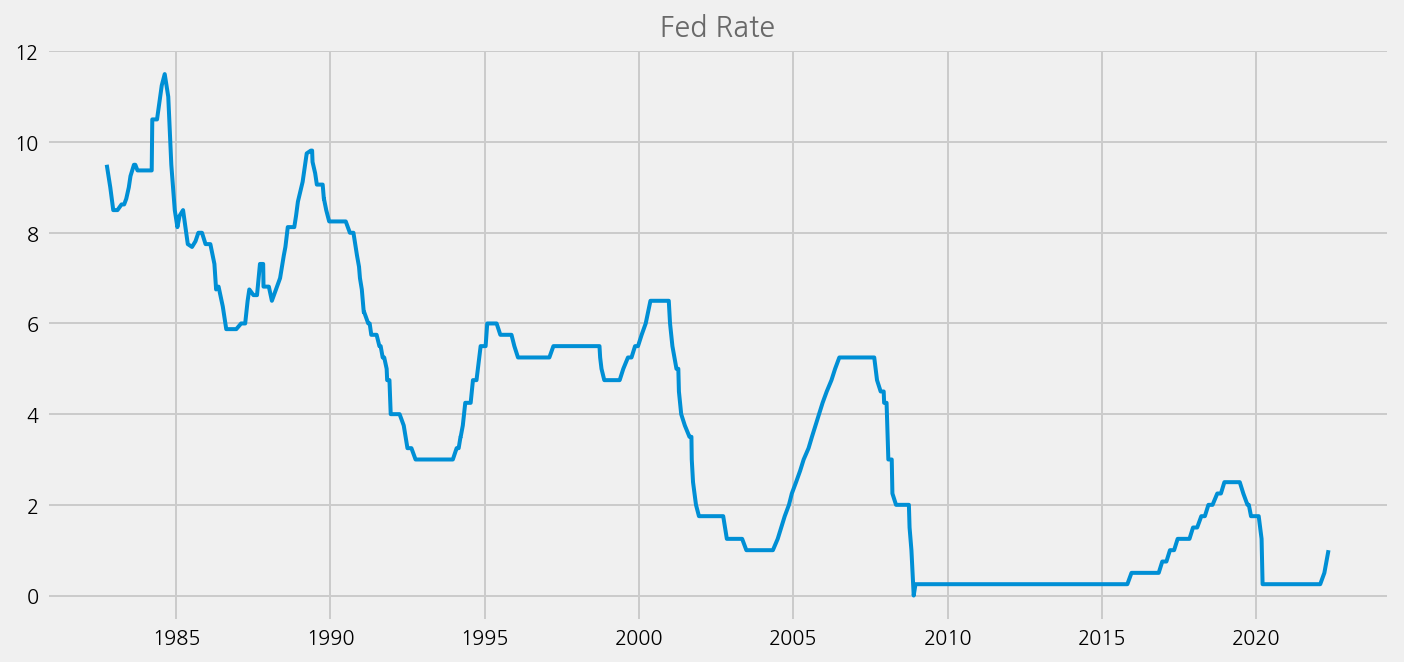

In [9]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = "rate"
cfg.ax.title = "Fed Rate"
eKonf.instantiate(cfg, data=fomc.calendar)


In [10]:
tone_data = tone_data_lm.merge(tone_data_finbert, left_index=True, right_index=True)
tone_data = tone_data.merge(tone_data_t5, left_index=True, right_index=True)
tone_data.index.name = "date"
tone_data = tone_data[tone_data.index.year >= (start_year - 1)]
tone_data


,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,finbert_mean_speech,finbert_mean_statement,finbert_diffusion_minutes,finbert_diffusion_press_conf,finbert_diffusion_speech,finbert_diffusion_statement,t5_diffusion_minutes,t5_diffusion_press_conf,t5_diffusion_speech,t5_diffusion_statement
date,,,,,,,,,,,,,,,,,,,,,
1998-01-03,NaN,NaN,NaN,NaN,-0.018248,NaN,NaN,NaN,NaN,NaN,...,0.264435,NaN,NaN,NaN,0.357664,NaN,NaN,NaN,0.094891,NaN
1998-01-08,NaN,NaN,NaN,NaN,-0.379629,NaN,NaN,NaN,NaN,NaN,...,0.503096,NaN,NaN,NaN,0.672840,NaN,NaN,NaN,0.277778,NaN
1998-01-12,NaN,NaN,NaN,NaN,-0.030516,NaN,NaN,NaN,NaN,NaN,...,0.293520,NaN,NaN,NaN,0.380282,NaN,NaN,NaN,0.260563,NaN
1998-01-16,NaN,NaN,NaN,NaN,-0.029630,NaN,NaN,NaN,NaN,NaN,...,0.408889,NaN,NaN,NaN,0.518519,NaN,NaN,NaN,0.382716,NaN
1998-01-29,NaN,NaN,NaN,NaN,NaN,NaN,-0.376811,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,NaN,NaN,-0.167014,NaN,-0.120000,NaN,NaN,NaN,...,0.182338,NaN,NaN,NaN,0.239583,NaN,NaN,NaN,0.239583,NaN
2021-12-01,-0.046022,NaN,NaN,NaN,NaN,NaN,NaN,-0.048109,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,-0.077381,NaN,NaN,NaN,NaN,NaN,...,0.262141,NaN,NaN,NaN,0.338889,NaN,NaN,NaN,0.250000,NaN


In [ ]:
cols = [
    "polarity_diffusion_minutes",
    "polarity_diffusion_press_conf",
    "polarity_diffusion_speech",
    "polarity_diffusion_statement",
    "finbert_diffusion_minutes",
    "finbert_diffusion_press_conf",
    "finbert_diffusion_speech",
    "finbert_diffusion_statement",
    "t5_diffusion_minutes",
    "t5_diffusion_press_conf",
    "t5_diffusion_speech",
    "t5_diffusion_statement",
]


merged_tone_data = fomc.calendar.copy()

for name in cols:
    offset = dict(months=0, days=1)
    data = tone_data.dropna(subset=[name])
    merged_tone_data = fomc.add_available_latest(
        merged_tone_data, data, name, [name], offset
    )

merged_tone_data = merged_tone_data[
    (merged_tone_data.index.year >= (start_year - 1))
    & (merged_tone_data.index.year < 2022)
]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data


In [12]:
import numpy as np

tone_columns = {
    "lm": [
        "polarity_diffusion_minutes",
        "polarity_diffusion_speech",
        "polarity_diffusion_statement",
    ],
    "finbert": [
        "finbert_diffusion_minutes",
        "finbert_diffusion_speech",
        "finbert_diffusion_statement",
    ],
    "t5": ["t5_diffusion_minutes", "t5_diffusion_speech", "t5_diffusion_statement"],
}

tone_cols = []
for name, cols in tone_columns.items():
    tone_col = name + "_tones"
    tone_cols.append(tone_col)
    merged_tone_data[tone_col] = merged_tone_data[cols].mean(axis=1, skipna=True)

merged_tone_data = merged_tone_data.copy()[merged_tone_data.index.year >= start_year]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data


,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed,polarity_diffusion_minutes,polarity_diffusion_minutes_date,...,t5_diffusion_minutes_date,t5_diffusion_press_conf,t5_diffusion_press_conf_date,t5_diffusion_speech,t5_diffusion_speech_date,t5_diffusion_statement,t5_diffusion_statement_date,lm_tones,finbert_tones,t5_tones
date,,,,,,,,,,,,,,,,,,,,,
1999-02-03,False,False,False,Alan Greenspan,4.75,0.00,0.0,0,-0.096552,1998-12-22,...,1998-12-22,NaN,NaT,0.111111,1999-01-21,0.136364,1998-11-17,-0.243343,0.506885,0.222721
1999-03-30,False,False,False,Alan Greenspan,4.75,0.00,0.0,0,-0.072464,1999-02-03,...,1999-02-03,NaN,NaT,0.187050,1999-03-25,0.136364,1998-11-17,-0.241290,0.529236,0.243070
1999-05-18,False,False,False,Alan Greenspan,4.75,0.00,0.0,0,-0.050360,1999-03-30,...,1999-03-30,NaN,NaT,0.245509,1999-05-13,0.136364,1998-11-17,-0.112051,0.579674,0.285564
1999-06-30,False,False,False,Alan Greenspan,5.00,0.25,1.0,1,-0.028169,1999-05-18,...,1999-05-18,NaN,NaT,0.097561,1999-06-22,0.625000,1999-05-18,-0.050040,0.621722,0.412215
1999-08-24,False,False,False,Alan Greenspan,5.25,0.25,1.0,1,-0.059524,1999-06-30,...,1999-06-30,NaN,NaT,0.178947,1999-07-29,0.269231,1999-06-30,-0.135226,0.548355,0.343837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,False,True,False,Jerome Powell,0.25,0.00,0.0,0,-0.040741,2021-04-28,...,2021-04-28,0.142012,2021-04-28,0.330709,2021-06-03,0.384615,2021-04-28,0.086359,0.582206,0.374244
2021-07-28,False,False,False,Jerome Powell,0.25,0.00,0.0,0,0.031142,2021-06-16,...,2021-06-16,0.194737,2021-06-16,0.228070,2021-07-11,0.615385,2021-06-16,0.167826,0.419857,0.433401
2021-09-22,False,True,False,Jerome Powell,0.25,0.00,0.0,0,-0.069079,2021-07-28,...,2021-07-28,0.197674,2021-07-28,0.148148,2021-09-09,0.538462,2021-07-28,0.176087,0.441048,0.367028


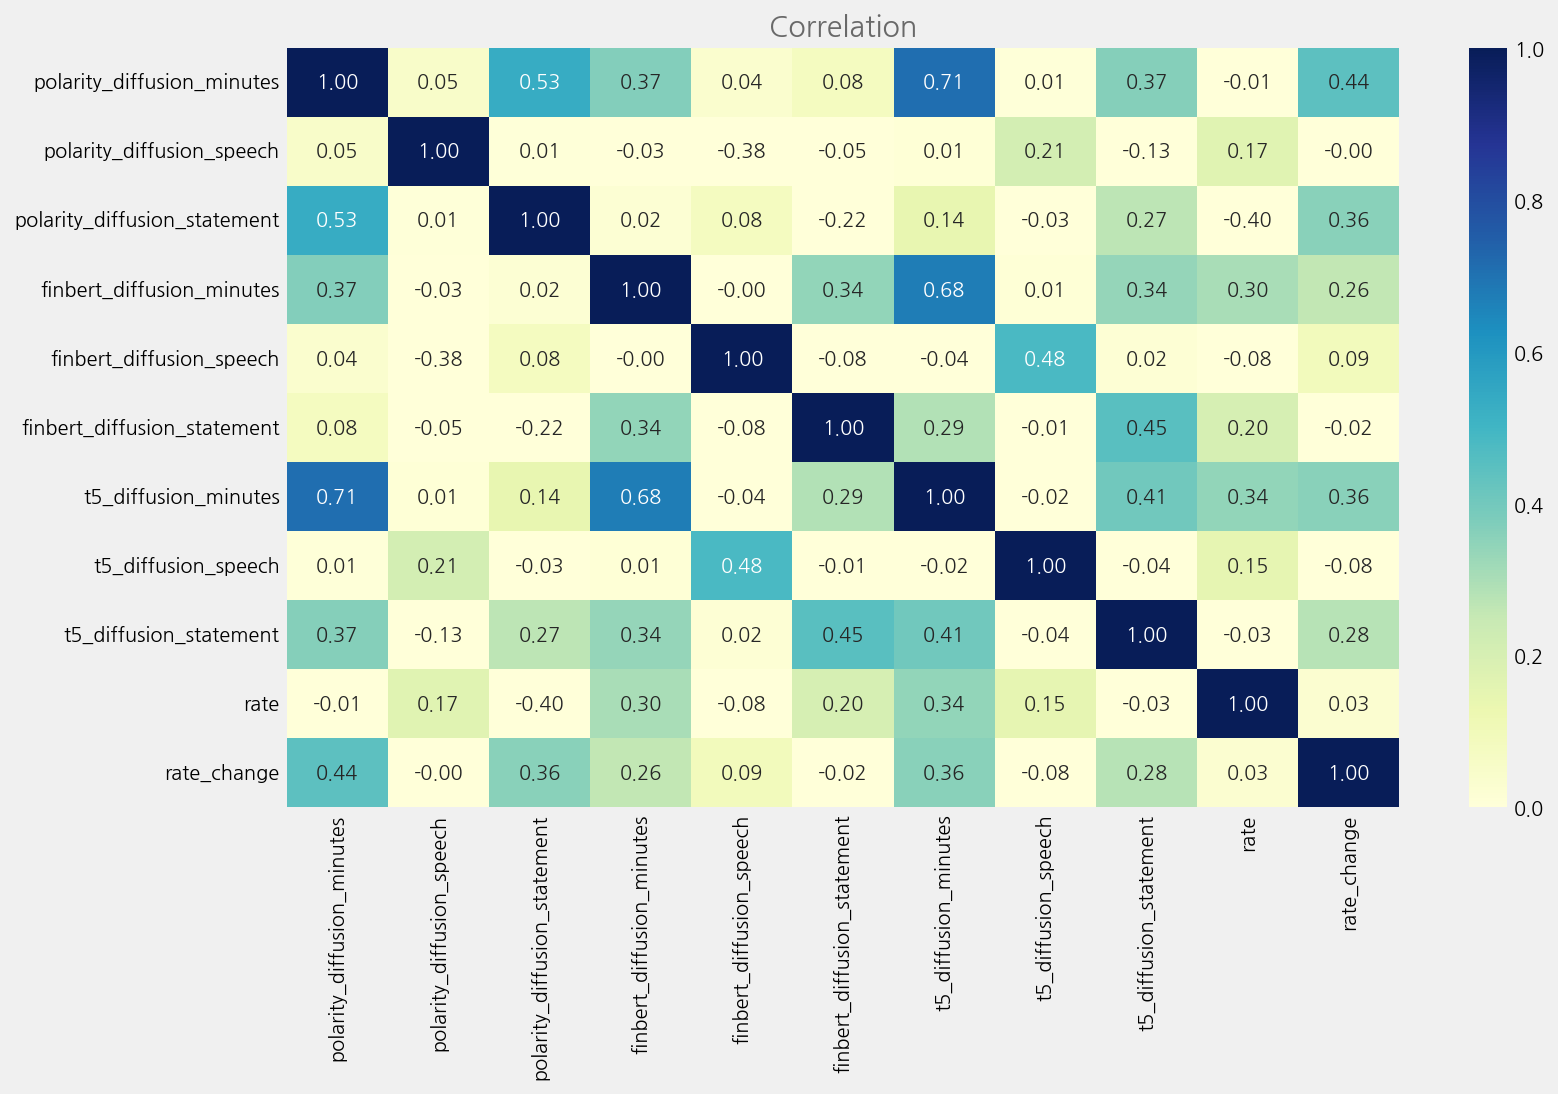

In [13]:
corr_columns = sum(tone_columns.values(), []) + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (12, 8)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

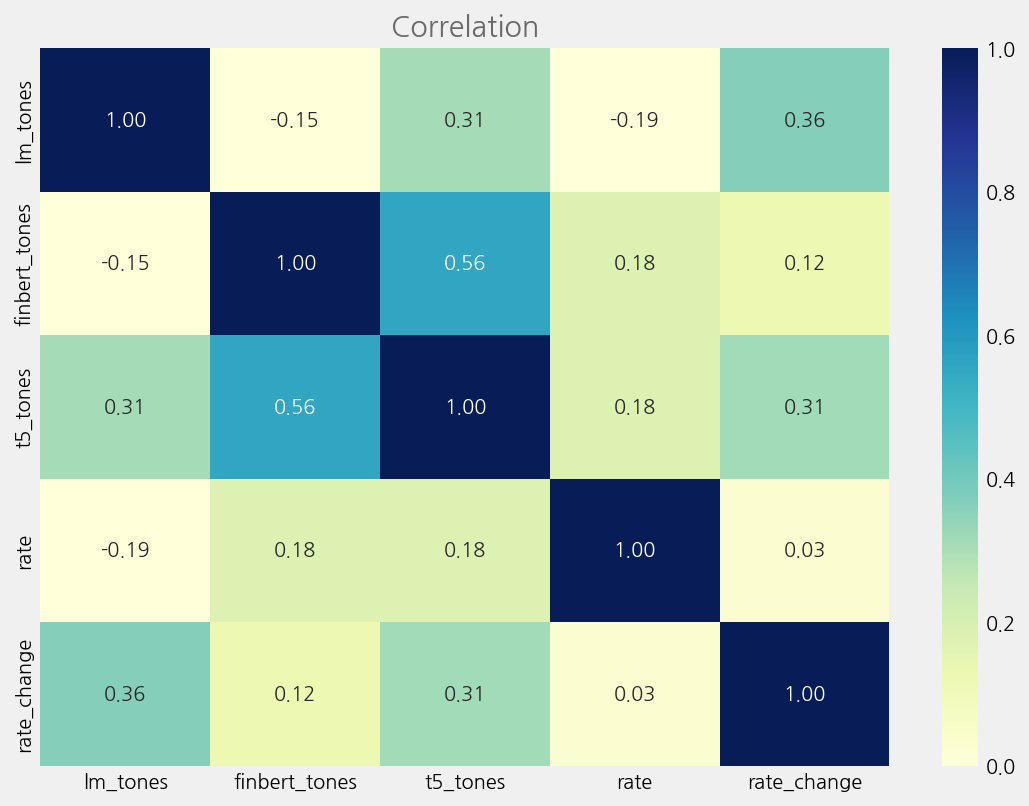

In [15]:
corr_columns = tone_cols + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (8, 6)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)